Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

Load and Explore the Dataset

In [7]:
df = pd.read_csv(r'C:\Users\guggi\Downloads\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df.shape
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [26]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Exploratory Data Analysis 

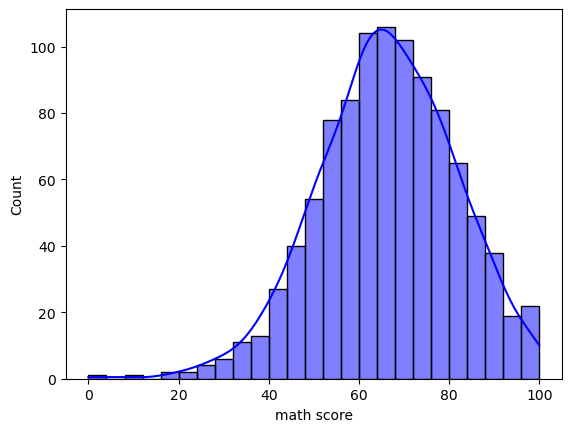

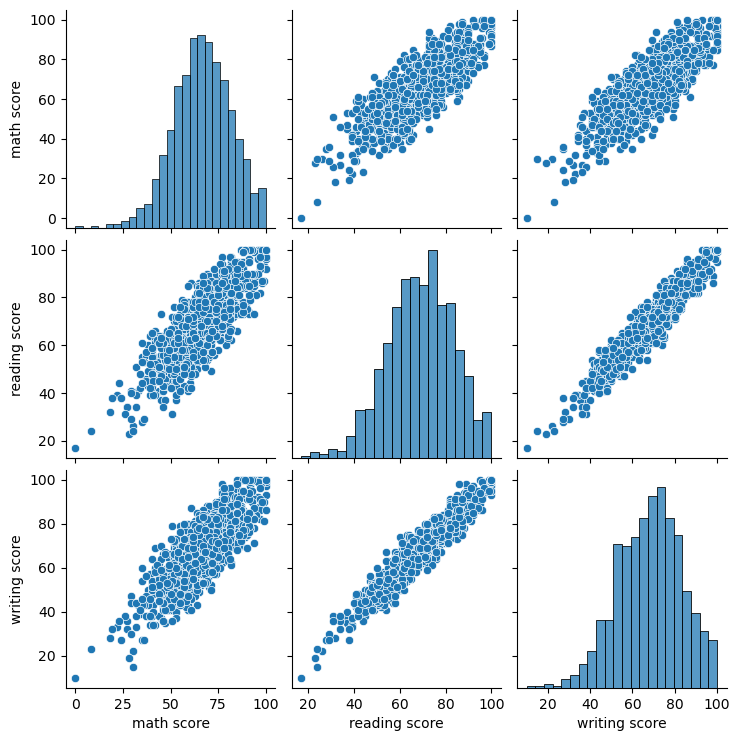

In [36]:
sns.histplot(df['math score'],kde = True, color = 'blue')
sns.pairplot(df)
plt.show()

In [ ]:
Data Preprocessing

In [46]:
df_encoded = pd.get_dummies(df, drop_first =True)
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


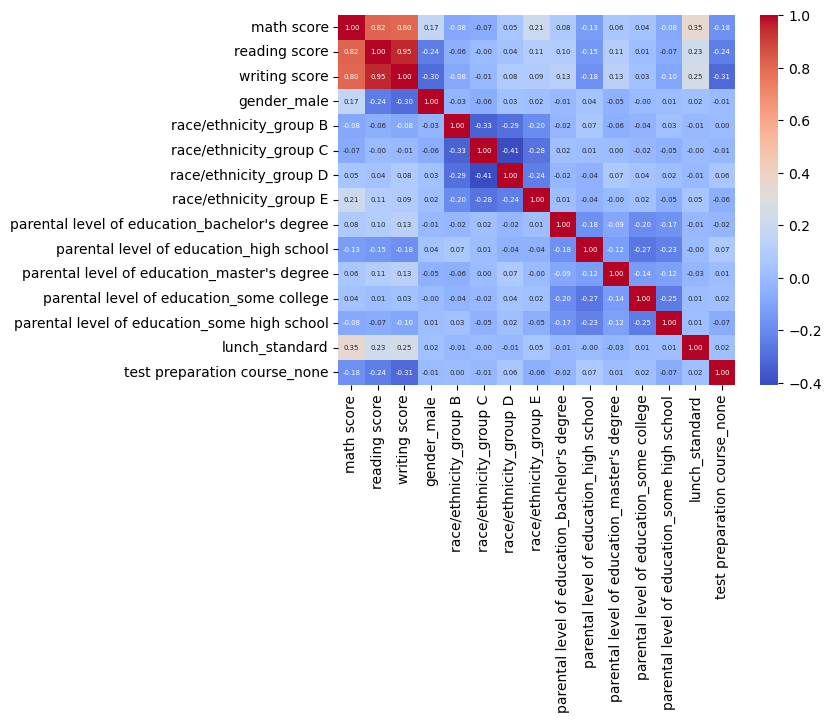

In [136]:
sns.heatmap(df_encoded.corr(), annot = True, fmt = ".2f" , annot_kws = {"size": 5}, cmap = "coolwarm")
plt.show()

In [60]:
x = df_encoded.drop(['math score'],axis = 1)
y = df_encoded['math score']

In [ ]:
Train/Test Split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [ ]:
create model

In [74]:
model = LinearRegression()

In [ ]:
Train the Model

In [86]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
Make Predictions 

In [98]:
pred = model.predict(x_test)

In [92]:
print("coefecients: ",model.coef_)
print("intercept: ", model.intercept_)

coefecients:  [ 0.22450015  0.74843778 13.38082073  0.92790818 -0.0563108  -0.03676764
  4.80267018 -0.21913398  0.42802545 -1.49295546  0.47405947  0.65163356
  2.84816393  4.06416579]
intercept:  -12.050066132856685


In [ ]:
Evaluate

In [100]:
print("MSE : ",mean_squared_error(pred,y_test))
print("r2 score : ", r2_score(pred,y_test))

MSE :  28.14963865855352
r2 score :  0.8734600708831605


In [ ]:
Plot prediction vs actual

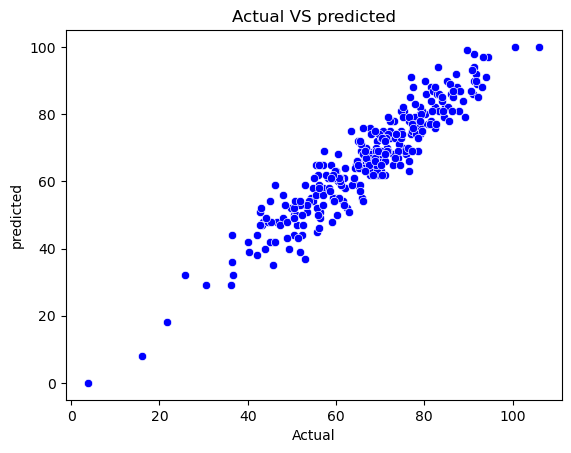

In [120]:
sns.scatterplot(x=pred,y=y_test, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Actual VS predicted")
plt.show()